In [81]:

import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.iolib.table import SimpleTable
import statsmodels.tsa.arima_model as arimamodel
import numpy as np


В этом задании вам предстоит иметь дело с искусственно сгенерированными временными рядами, которые находятся в файле artdata_1000.csv.

In [43]:
df = pd.read_csv("artdata_1000.csv")
df.head()

,t,000,001,002,003,004,005,006,007,008,...,990,991,992,993,994,995,996,997,998,999
0,0,0.200000,0.200000,0.200000,0.200000,0.200482,0.202545,0.200543,0.202054,0.205929,...,0.866122,0.649513,0.333150,0.703060,0.940617,0.009029,0.599111,0.168570,0.129886,0.734205
1,1,0.260337,0.260337,0.260337,0.260337,0.260710,0.262667,0.260693,0.262096,0.265751,...,0.908652,0.640843,0.363166,0.750696,0.997029,0.001046,0.583546,0.116514,0.086301,0.724486
2,2,0.320063,0.320063,0.320063,0.320063,0.320280,0.322056,0.320117,0.321595,0.325106,...,0.934933,0.665507,0.356261,0.776824,0.923966,0.017329,0.606290,0.179704,0.103170,0.745012
3,3,0.378571,0.378571,0.378571,0.378571,0.378456,0.380108,0.378335,0.380094,0.383261,...,0.941699,0.677883,0.407456,0.810320,0.861631,0.042103,0.604748,0.159807,0.075890,0.733275
4,4,0.435269,0.435269,0.435269,0.435269,0.435137,0.436532,0.434730,0.436384,0.439805,...,0.894942,0.643097,0.435345,0.828033,0.891476,0.081389,0.638462,0.167049,0.113257,0.774902


Выберем два ряда, с которыми предстоит работать. Пусть будет первый и последний.

In [42]:
ts1 = df['000']
ts2 = df['999']
df['000']

0      0.200000
1      0.260337
2      0.320063
3      0.378571
4      0.435269
         ...   
495    0.435269
496    0.378571
497    0.320063
498    0.260337
499    0.200000
Name: 000, Length: 500, dtype: float64

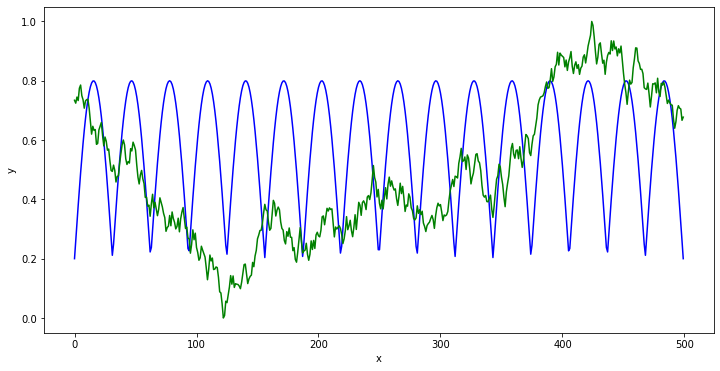

In [10]:
plt.figure(figsize(12,6))
ts1.plot(color='b')
ts2.plot(color='g')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [15]:
print(ts1.head(10))
print(ts1.shape)

0    0.200000
1    0.260337
2    0.320063
3    0.378571
4    0.435269
5    0.489582
6    0.540958
7    0.588878
8    0.632856
9    0.672444
Name: 000, dtype: float64
(500,)


In [5]:
ts1_train = ts1[:350]
ts1_test = ts1[350:]

ts2_train = ts2[:350]
ts2_test = ts2[350:]

# Вопрос 1:
Проанализируйте стационарность ряда (train часть) с помощью теста Дики-Фуллера. Ряд стационарен? Чему равно p-value?

Посчитаем коэффициенты автокорреляции

 period max =  1
 r max =  0.9661291116399442


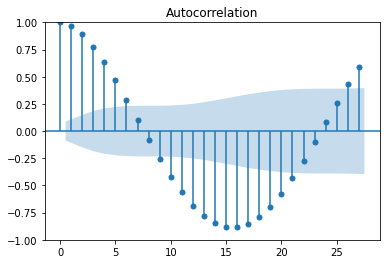

In [60]:
print(" period max = ", sm.tsa.acf(ts1)[1:].argmax()+1)
print(" r max = ", sm.tsa.acf(ts1)[1:].max())
tsaplots.plot_acf(ts1)
plt.show()

В этом ряде мы наблюдаем тенденцию, так как лаг автокорелляции равняется 1 (максимум автокорреляция 0.96)

In [41]:
ts1.describe()

count    500.000000
mean       0.581207
std        0.185446
min        0.200000
25%        0.428301
50%        0.623594
75%        0.754147
max        0.799997
Name: 000, dtype: float64

Проведем тест Харки-Беккера для проверки нормальности распределения временного ряда. Если p value минимально, то нулевая гипотеза верна. Проведя тест, получаем вероятность отвержения теории около 0, значит распределение нормальное.

In [54]:
e = sm.stats.stattools.jarque_bera(ts1)
a = np.vstack([e])
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
r = SimpleTable(a, row)
r

JB,p-value,skew,kurtosis
44.36841522126826,2.3201766367411293e-10,-0.49654159473444237,1.9306685689576015


Теперь проверим, что временной ряд стационарен с помощью критерия Дики-Фуллера. 

In [57]:
test = sm.tsa.adfuller(ts1)
test

(-14.487274113984414,
 6.231201929041897e-27,
 18,
 481,
 {'1%': -3.4440184853599876,
  '5%': -2.867567599912013,
  '10%': -2.5699804779975883},
 -2849.236734005988)

И проверим второй ряд на стационарность. Здесь вероятность отвержения нулевой гипотезы 60%, следовательно ряд не стационарен.

In [61]:
test_ts2 = sm.tsa.adfuller(ts2)
test_ts2

(-1.351847534786347,
 0.6051311651019367,
 3,
 496,
 {'1%': -3.4436029548776395,
  '5%': -2.867384756137026,
  '10%': -2.5698830308597813},
 -2043.916272604018)

# Вопрос 2:
Нарисуйте график автокорреляций и частичных автокорреляций. Какие лаги являются значимыми?

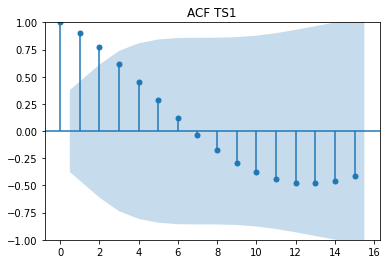

In [65]:
ts1_acf = sm.tsa.acf(ts1)
tsaplots.plot_acf(ts1_acf, title="ACF TS1")
plt.show()


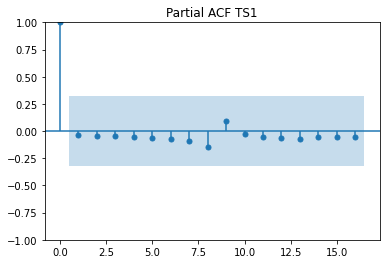

In [78]:
ts1_pacf = sm.tsa.pacf(ts1, nlags=36)
tsaplots.plot_pacf(ts1_pacf, title="Partial ACF TS1")
plt.show()

0           NaN
1     -0.009719
2      0.020526
3     -0.011736
4      0.041626
         ...   
495    0.015874
496   -0.008295
497   -0.002916
498   -0.038174
499    0.010788
Name: 999, Length: 500, dtype: float64


C:\Users\sirau\AppData\Roaming\Python\Python310\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


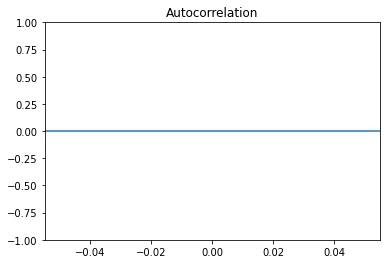

In [155]:
acf_ts2 = sm.tsa.acf(ts2.diff())
tsaplots.plot_acf(acf_ts2)
plt.show()

c:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


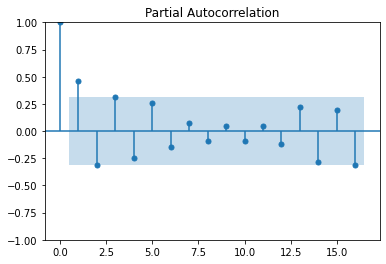

In [79]:
pacf_ts2 = sm.tsa.pacf(ts2, nlags=38)
tsaplots.plot_pacf(pacf_ts2)
plt.show()


# Вопрос 3:
1. Выберите потенциальные параметры модели ARIMA (укажите основание для их выбора; подсказка: стационарность, значимые лаги на графиках корреляций).
2. Выберите наилучшие значения параметров с точки зрения критерия Акайке.
3. Сделайте прогноз на тестовый период.

c:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


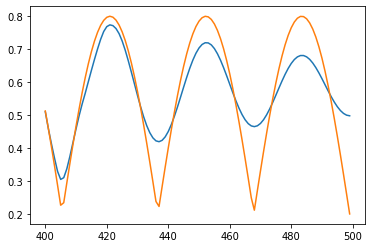

In [152]:
amodel = arimamodel.ARIMA(ts1[:400], order=(5, 0, 20))
model = amodel.fit()
model.summary()
result = model.forecast(100)
real = ts1[400:]
result.plot()
real.plot()
plt.show()



# Вопрос 4:
Оцените качество вашего прогноза (обоснуйте выбор метрики; прокомментируйте полученный результат)

In [ ]:
#CODE for question 4